In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Indian_Kids_Screen_Time.csv')

print(data.head())

   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     Poor Sleep, Anx

In [3]:
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB
None


In [5]:
print(data.describe())

               Age  Avg_Daily_Screen_Time_hr  \
count  9712.000000               9712.000000   
mean     12.979201                  4.352837   
std       3.162437                  1.718232   
min       8.000000                  0.000000   
25%      10.000000                  3.410000   
50%      13.000000                  4.440000   
75%      16.000000                  5.380000   
max      18.000000                 13.890000   

       Educational_to_Recreational_Ratio  
count                        9712.000000  
mean                            0.427226  
std                             0.073221  
min                             0.300000  
25%                             0.370000  
50%                             0.430000  
75%                             0.480000  
max                             0.600000  


In [6]:
data.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [7]:
print(data.isnull().sum())

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [8]:
print(data.isnull().sum())

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


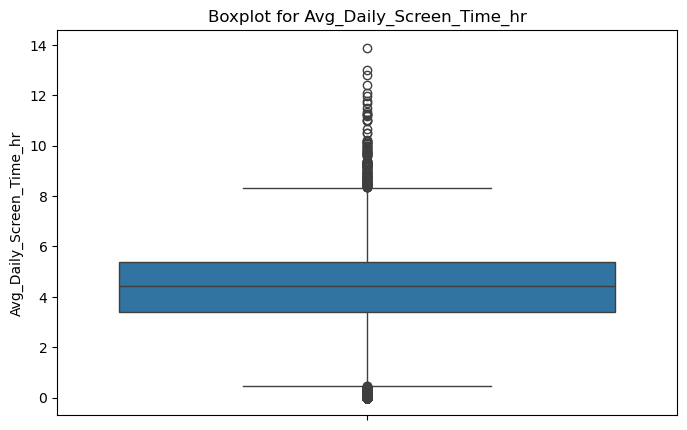

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                9712 non-null   int64   
 1   Gender                             9712 non-null   category
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64 
 3   Primary_Device                     9712 non-null   category
 4   Exceeded_Recommended_Limit         9712 non-null   bool    
 5   Educational_to_Recreational_Ratio  9712 non-null   float64 
 6   Health_Impacts                     9712 non-null   object  
 7   Urban_or_Rural                     9712 non-null   category
 8   Anxiety                            9712 non-null   int64   
 9   Eye Strain                         9712 non-null   int64   
 10  None                               9712 non-null   int64   
 11  Obesity Risk                       9712 non

In [9]:
data['Health_Impacts'] = data['Health_Impacts'].fillna('None')  # Replace NaN with 'None'
health_impacts = data['Health_Impacts'].str.get_dummies(', ')  # Split into binary columns
data = pd.concat([data, health_impacts], axis=1)

data['Gender'] = data['Gender'].astype('category')
data['Primary_Device'] = data['Primary_Device'].astype('category')
data['Urban_or_Rural'] = data['Urban_or_Rural'].astype('category')
data['Exceeded_Recommended_Limit'] = data['Exceeded_Recommended_Limit'].astype('bool')

plt.figure(figsize=(8,5))
sns.boxplot(data['Avg_Daily_Screen_Time_hr'])
plt.title("Boxplot for Avg_Daily_Screen_Time_hr")
plt.show()

Q1 = data['Avg_Daily_Screen_Time_hr'].quantile(0.25)
Q3 = data['Avg_Daily_Screen_Time_hr'].quantile(0.75)
IQR = Q3 -Q1
upper_bound = Q3 + 1.5 * IQR
data['Avg_Daily_Screen_Time_hr'] = data['Avg_Daily_Screen_Time_hr'].clip(upper=upper_bound)

print(data.info())



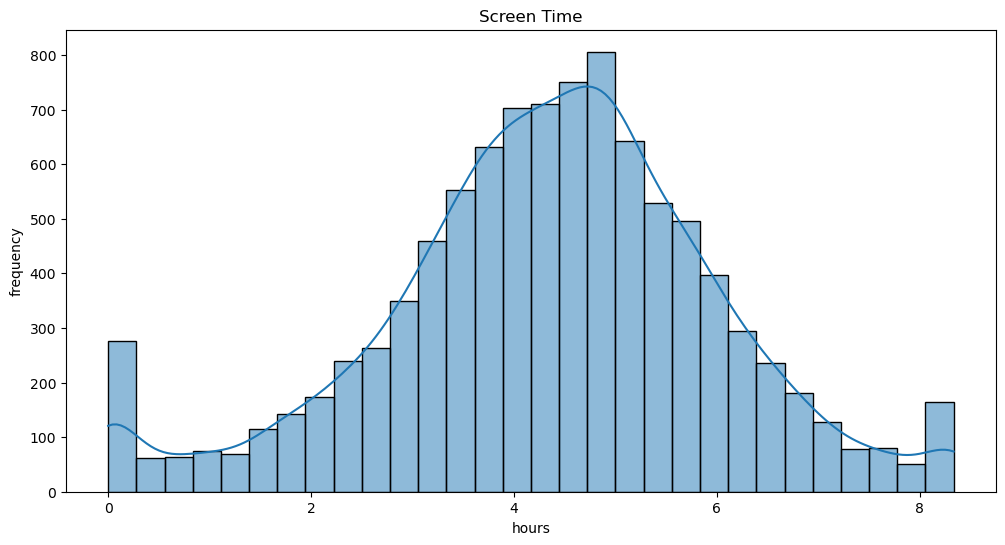

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data['Avg_Daily_Screen_Time_hr'], bins=30, kde= True)
plt.title("Screen Time")
plt.xlabel('hours')
plt.ylabel('frequency')
plt.show()

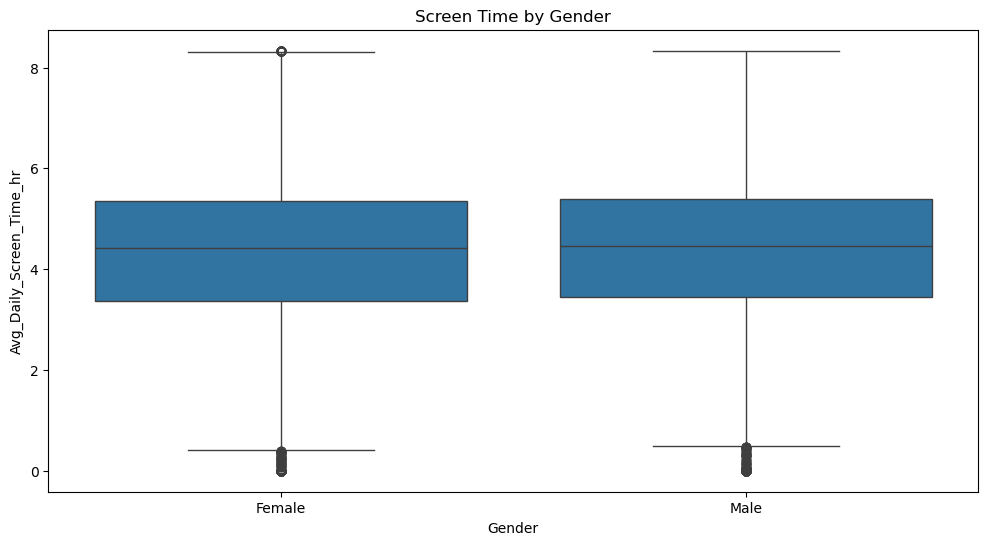

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data= data)
plt.title("Screen Time by Gender")
plt.show()

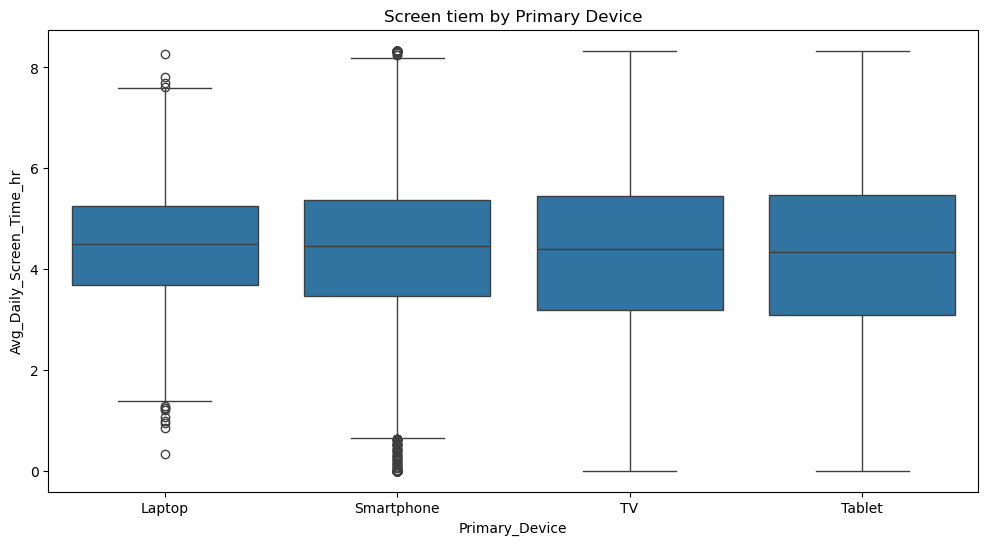

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', data=data)
plt.title("Screen tiem by Primary Device")
plt.show()


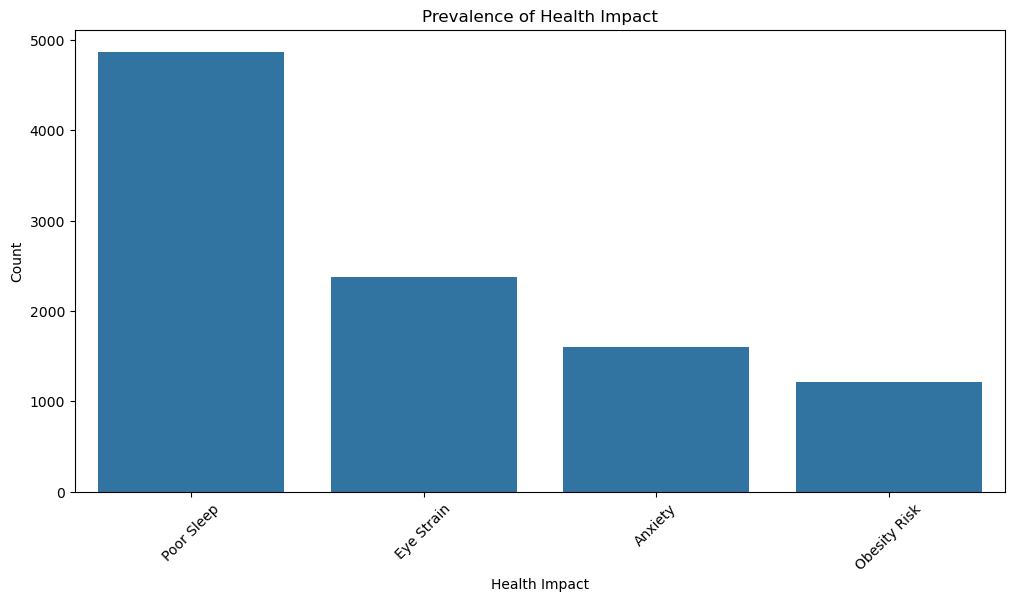

In [31]:
health_columns = ['Poor Sleep', 'Eye Strain', 'Anxiety', 'Obesity Risk']
health_counts = data[health_columns].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=health_counts.index, y=health_counts.values)
plt.title("Prevalence of Health Impact")
plt.xlabel("Health Impact")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


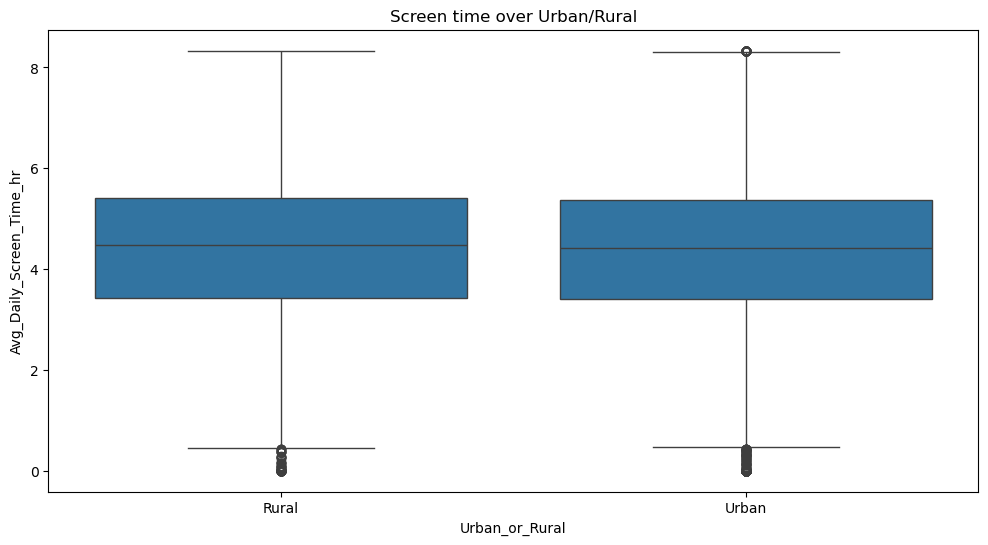

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=data)
plt.title("Screen time over Urban/Rural")
plt.show()


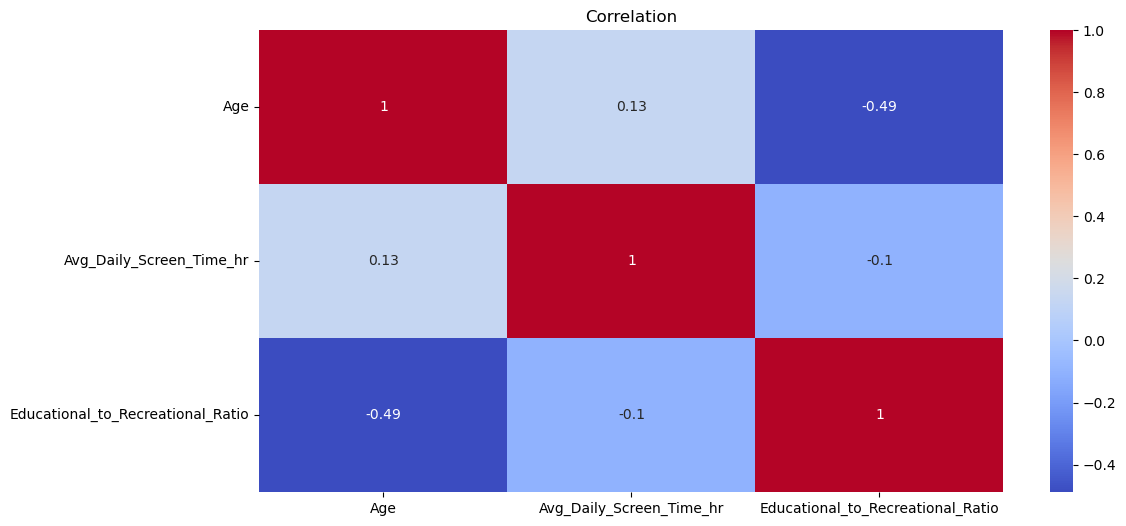

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(data[['Age','Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

In [37]:
from scipy.stats import ttest_ind, chi2_contingency

male_screen_time = data[data['Gender'] == 'Male']['Avg_Daily_Screen_Time_hr']
female_screen_time = data[data['Gender'] == 'Female']['Avg_Daily_Screen_Time_hr']
t_stat, p_value = ttest_ind(male_screen_time, female_screen_time)
print(f"T-test for Scree time by Gender : T-Statistic = {t_stat:.2f} | P value = {p_value:.4f}")

urban_screen_time = data[data['Urban_or_Rural'] == 'Urban']['Avg_Daily_Screen_Time_hr']
rural_screen_time = data[data['Urban_or_Rural'] == 'Rural']['Avg_Daily_Screen_Time_hr']
t_stat, p_value = ttest_ind(urban_screen_time, rural_screen_time)
print(f"T-test for Scree time by Gender : T-Statistic = {t_stat:.2f} | P value = {p_value:.4f}")

health_vs_limit = pd.crosstab(data['Exceeded_Recommended_Limit'], data['Poor Sleep'])
chi2, p_value, dof, ex = chi2_contingency(health_vs_limit)
print(f"Chi-square Test for Poor Sleep vs. Exceeded Limit : Chi2 = {chi2:.2f} | P value = {p_value:.4f}")

T-test for Scree time by Gender : T-Statistic = 1.58 | P value = 0.1150
T-test for Scree time by Gender : T-Statistic = -0.60 | P value = 0.5491
Chi-square Test for Poor Sleep vs. Exceeded Limit : Chi2 = 1656.68 | P value = 0.0000


In [63]:
smartphone_time = data[data['Primary_Device'] == 'Smartphone']['Avg_Daily_Screen_Time_hr']
laptop_time = data[data['Primary_Device'] == 'Laptop']['Avg_Daily_Screen_Time_hr']
t_stat, p_value = ttest_ind(smartphone_time, laptop_time)
print(f"T-test for Screen Time by Device: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

T-test for Screen Time by Device: t-statistic = -1.83, p-value = 0.0680


In [64]:
health_vs_limit = pd.crosstab(data['Exceeded_Recommended_Limit'], data['Eye Strain'])
chi2, p, dof, ex = chi2_contingency(health_vs_limit)
print(f"Chi-square Test for Eye Strain vs. Exceeded Limit: chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi-square Test for Eye Strain vs. Exceeded Limit: chi2 = 534.92, p-value = 0.0000


In [65]:
health_vs_limit = pd.crosstab(data['Exceeded_Recommended_Limit'], data['Anxiety'])
chi2, p, dof, ex = chi2_contingency(health_vs_limit)
print(f"Chi-square Test for Anxiety vs. Exceeded Limit: chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi-square Test for Anxiety vs. Exceeded Limit: chi2 = 325.43, p-value = 0.0000


In [66]:
tablet_time = data[data['Primary_Device'] == 'Tablet']['Avg_Daily_Screen_Time_hr']
t_stat, p_value = ttest_ind(smartphone_time, tablet_time)
print(f"T-test for Screen Time by Smartphone vs. Tablet: t-statistic = {t_stat:.2f}, p-value = {p:.4f}")

T-test for Screen Time by Smartphone vs. Tablet: t-statistic = 3.22, p-value = 0.0000


In [67]:
for health in ['Anxiety', 'Obesity Risk']:
    health_vs_limit = pd.crosstab(data['Exceeded_Recommended_Limit'], data[health])
    chi2, p, dof, ex = chi2_contingency(health_vs_limit)
    print(f"Chi-square Test for {health} vs. Exceeded Limit: chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi-square Test for Anxiety vs. Exceeded Limit: chi2 = 325.43, p-value = 0.0000
Chi-square Test for Obesity Risk vs. Exceeded Limit: chi2 = 235.17, p-value = 0.0000


In [68]:
laptop_time = data[data['Primary_Device'] == 'Laptop']['Avg_Daily_Screen_Time_hr']
tablet_time = data[data['Primary_Device'] == 'Tablet']['Avg_Daily_Screen_Time_hr']
t_stat, p_value = ttest_ind(laptop_time, tablet_time)
print(f"T-test for Screen Time by Laptop vs. Tablet: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

T-test for Screen Time by Laptop vs. Tablet: t-statistic = 4.20, p-value = 0.0000


Accuracy Score = 0.96
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       285
           1       0.98      0.98      0.98      1658

    accuracy                           0.96      1943
   macro avg       0.92      0.94      0.93      1943
weighted avg       0.96      0.96      0.96      1943



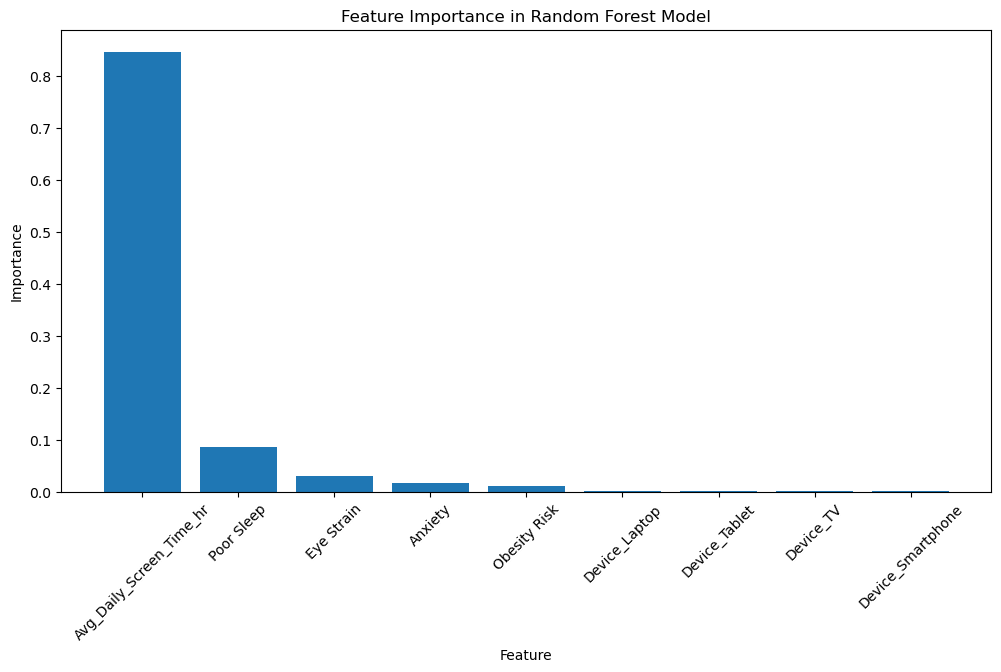

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data['Exceeded_Recommended_Limit'] = data['Exceeded_Recommended_Limit'].astype(int)

device_dummies = pd.get_dummies(data['Primary_Device'], prefix = 'Device')
data = pd.concat([data, device_dummies], axis=1)

features = ['Avg_Daily_Screen_Time_hr', 'Poor Sleep', 'Eye Strain', 'Anxiety', 'Obesity Risk'] + [col for col in device_dummies.columns]

X=data[features]
y=data['Exceeded_Recommended_Limit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

y_pred= rf_model.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {accuracy:.2f}")

print("Classification Report")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.xticks(rotation=45)
plt.show()

In [43]:
print(len(features))  # Should match the number of columns in X
print(len(rf_model.feature_importances_))  # Should equal len(features)
print(X.columns)  # List of columns used in training

9
25
Index(['Avg_Daily_Screen_Time_hr', 'Poor Sleep', 'Eye Strain', 'Anxiety',
       'Obesity Risk', 'Device_Laptop', 'Device_Laptop', 'Device_Laptop',
       'Device_Laptop', 'Device_Laptop', 'Device_Smartphone',
       'Device_Smartphone', 'Device_Smartphone', 'Device_Smartphone',
       'Device_Smartphone', 'Device_TV', 'Device_TV', 'Device_TV', 'Device_TV',
       'Device_TV', 'Device_Tablet', 'Device_Tablet', 'Device_Tablet',
       'Device_Tablet', 'Device_Tablet'],
      dtype='object')


In [48]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross Validation Score : {cv_scores.mean():.2f} (+/-{cv_scores.std()*2:.2f})")

Cross Validation Score : 0.96 (+/-0.01)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model_balanced= RandomForestClassifier(n_estimators=100, random_state=42, class_weight= 'balanced')
rf_model_balanced.fit(X_train,y_train)
y_balanced_pred=rf_model_balanced.predict(X_test)
accuracy= accuracy_score(y_test,y_balanced_pred)
print(f"Accuracy Score: {accuracy:.2f}")
print("Classification Report")
print(classification_report(y_test,y_balanced_pred))

Accuracy Score: 0.96
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       285
           1       0.99      0.97      0.98      1658

    accuracy                           0.96      1943
   macro avg       0.91      0.95      0.93      1943
weighted avg       0.97      0.96      0.96      1943



In [57]:
from sklearn.model_selection import GridSearchCV
param_grid= {'n_estimators': [100,200], 'max_depth': [10,20]}
grid_search= GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train,y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [60]:
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Accuracy = {accuracy_tuned:.2f}")

print("Tuned Classification Report")
print(classification_report(y_test,y_pred_tuned))

Tuned Accuracy = 0.96
Tuned Classification Report
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       285
           1       1.00      0.96      0.98      1658

    accuracy                           0.96      1943
   macro avg       0.90      0.97      0.93      1943
weighted avg       0.97      0.96      0.96      1943



In [61]:
import joblib
joblib.dump(best_model, 'rf_model_tuned.pkl')


['rf_model_tuned.pkl']